# Task_ECG

## Task description

Each student is assigned a variant of the same ECG processing task. The goal is to:
- Preprocess a simulated or real ECG signal.
- Apply bandpass filtering to remove baseline drift and high-frequency noise.
- Detect R-peaks in the filtered signal.
- Calculate and plot heart rate over time.
- Interpret the results based on signal quality and parameter choices.

The general structure of the task:
1. Load or simulate an ECG signal of a given duration and sampling rate.
2. Apply a bandpass filter with given cutoff frequencies.
3. Detect R-peaks using neurokit2 or a custom algorithm.
4. Compute instantaneous heart rate and visualize it.
5. Comment on how filtering affects R-peak detection.

Variant 6:
- Duration: 12 s,
- Sampling Rate: 500 Hz,
- Filter: 1–50 Hz,

## Python code

Installation of the necessary Python libraries

In [1]:
! pip install wfdb biosppy neurokit2
# ! pip install --upgrade FuzzyTM neurokit2 wfdb biosppy

   ---------------------------------------- 0.0/696.5 kB ? eta -:--:--
   --------------------------------------- 696.5/696.5 kB 27.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------------------- ------------------ 5.8/11.0 MB 27.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: aiohappyeyeballs
    Found existing installation: aiohappyeyeballs 2.4.0
    Uninstalling aiohappyeyeballs-2.4.0:
      Successfully uninstalled aiohappyeyeballs-2.4.0
  Attempting uninstall: yarl
    Found existing installation: yarl 1.11.0
    Uninstalling yarl-1.11.0:
      Successfully uninstalled yarl-1.11.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.10.5
    Uninstalling aiohttp-3.10.5:
      Successfully

### Step 1: Load/Simulate ECG Signal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk

sampling_rate = 500

# Simulate ECG signal
ecg = nk.ecg_simulate(duration=12, sampling_rate=sampling_rate, noise=0.05)
time = np.arange(len(ecg)) / 500  # Time axis in seconds


### Step 2: Apply Bandpass Filter (1–50 Hz)

In [ ]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 1.0, 50.0, sampling_rate)


### Step 3: Detect R-Peaks

In [ ]:
# Detect R-peaks using NeuroKit2
_, rpeaks_info = nk.ecg_peaks(filtered_ecg, sampling_rate=500)
rpeaks = rpeaks_info["ECG_R_Peaks"]


### Step 4: Compute and Plot Heart Rate

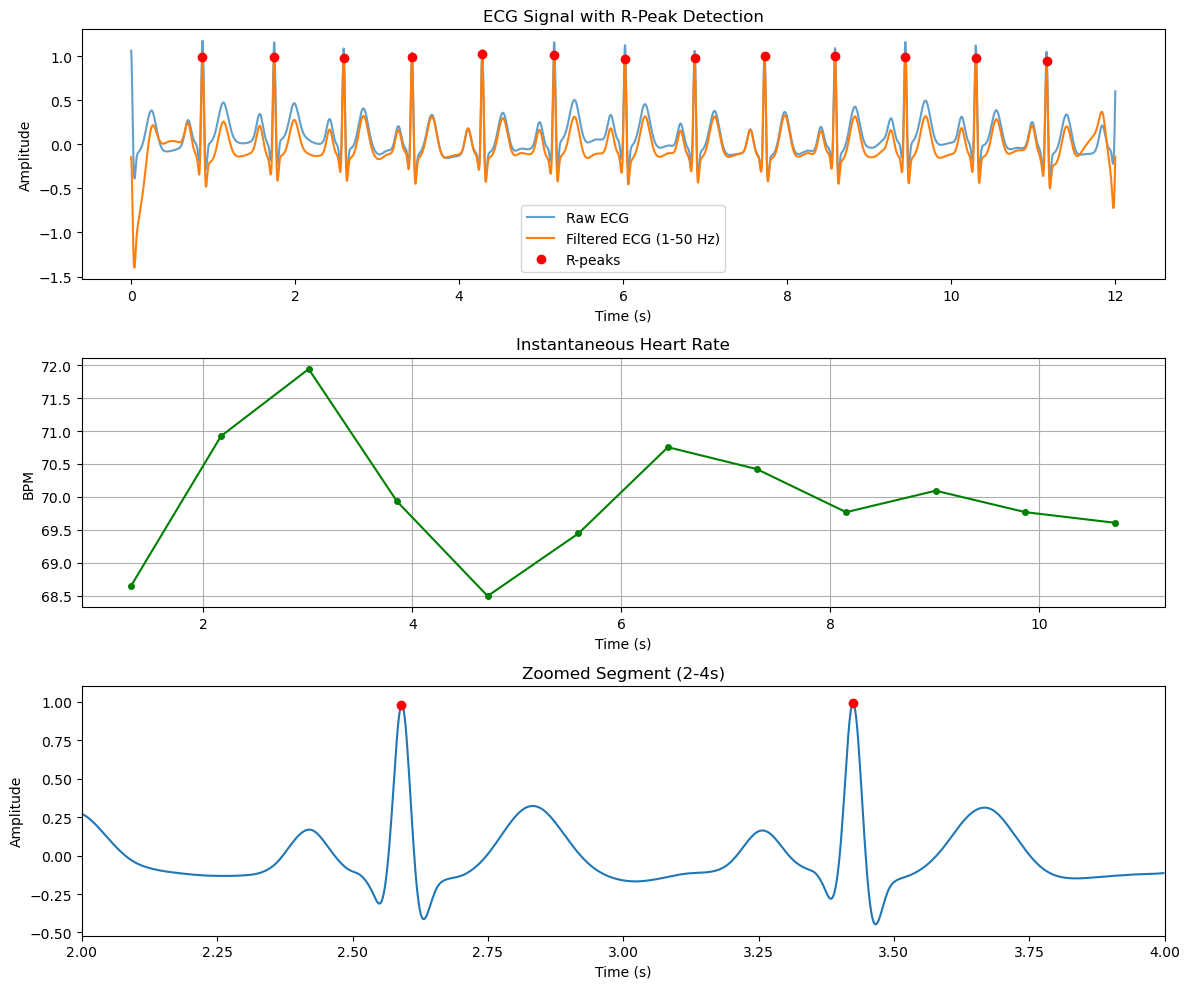

In [4]:
# Calculate R-R intervals and instantaneous heart rate (BPM)
rr_intervals = np.diff(rpeaks) / 500  # Convert to seconds
heart_rate = 60 / rr_intervals  # BPM

# Time points for heart rate (midpoint between R-peaks)
hr_time = (rpeaks[1:] + rpeaks[:-1]) / (2 * 500)

# Plotting
plt.figure(figsize=(12, 10))

# Raw vs. Filtered ECG
plt.subplot(3, 1, 1)
plt.plot(time, ecg, label='Raw ECG', alpha=0.7)
plt.plot(time, filtered_ecg, label='Filtered ECG (1-50 Hz)', linewidth=1.5)
plt.plot(rpeaks/500, filtered_ecg[rpeaks], 'ro', label='R-peaks')
plt.title("ECG Signal with R-Peak Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Heart Rate Over Time
plt.subplot(3, 1, 2)
plt.plot(hr_time, heart_rate, 'g-', marker='o', markersize=4)
plt.title("Instantaneous Heart Rate")
plt.xlabel("Time (s)")
plt.ylabel("BPM")
plt.grid(True)

# Zoomed ECG Segment
plt.subplot(3, 1, 3)
plt.plot(time[1000:2000], filtered_ecg[1000:2000], label='Filtered ECG')
plt.plot(rpeaks/500, filtered_ecg[rpeaks], 'ro', label='R-peaks')
plt.xlim(2, 4)  # Zoom into 2-4 seconds
plt.title("Zoomed Segment (2-4s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()